In [258]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from copy import deepcopy
import numpy as np

file_name = "clinical.csv"
df = pd.read_csv(file_name)
df.head()


,case_id,submitter_id,project_id,gender,year_of_birth,race,ethnicity,year_of_death,ann_arbor_b_symptoms,year_of_diagnosis,...,circumferential_resection_margin,ldh_normal_range_upper,ann_arbor_extranodal_involvement,lymph_nodes_positive,site_of_resection_or_biopsy,ajcc_pathologic_t,days_to_hiv_diagnosis,ajcc_clinical_stage,days_to_new_event,hiv_positive
0,0a11e958-7ec0-493c-bd7a-eb17536facd7,TCGA-CD-8530,TCGA-STAD,male,1960,asian,not hispanic or latino,--,--,--,...,--,--,--,--,C16.1,--,--,--,--,--
1,48c49eda-35b6-468d-8fff-cae9542db30d,AD8742,FM-AD,female,--,not reported,not reported,--,--,--,...,--,--,--,--,Liver,--,--,--,--,--
2,6d1981b8-7a0d-439c-ac15-efdbac623a19,AD7166,FM-AD,female,--,not reported,not reported,--,--,--,...,--,--,--,--,Liver,--,--,--,--,--
3,e2e610ce-31c3-4fc0-917d-92d48feb600a,TCGA-AB-2989,TCGA-LAML,male,1979,white,not hispanic or latino,2009,--,--,...,--,--,--,--,not reported,--,--,--,--,--
4,e3739ba3-3bef-46af-afa9-332754771c7a,AD13109,FM-AD,male,--,not reported,not reported,--,--,--,...,--,--,--,--,"Rectum, NOS",--,--,--,--,--


In [2]:
df.describe()

,case_id,submitter_id,project_id,gender,year_of_birth,race,ethnicity,year_of_death,ann_arbor_b_symptoms,year_of_diagnosis,...,circumferential_resection_margin,ldh_normal_range_upper,ann_arbor_extranodal_involvement,lymph_nodes_positive,site_of_resection_or_biopsy,ajcc_pathologic_t,days_to_hiv_diagnosis,ajcc_clinical_stage,days_to_new_event,hiv_positive
count,32555,32555,32555,32555,32555,32555,32555,32555,32555,32555,...,32555,32555,32555,32555,32555,32555,32555,32555,32555,32555
unique,32555,32555,40,5,92,8,5,26,1,1,...,1,1,1,1,228,1,1,1,1,1
top,603ca228-0a56-466e-89a8-0dc4338d8269,AD12147,FM-AD,female,--,not reported,not reported,--,--,--,...,--,--,--,--,"Lung, NOS",--,--,--,--,--
freq,1,1,18004,17471,21561,19618,20890,29850,32555,32555,...,32555,32555,32555,32555,2622,32555,32555,32555,32555,32555


In [217]:
import matplotlib as plt

# age stuff

def get_age_stats(df):
    target = "year_of_birth"
    ages = df[df[target] != "--"]
    ages = ages[target].apply(pd.to_numeric)
    age_stats = [get_average(ages), get_median(ages), get_range(ages), df[target].value_counts()]
    return age_stats
  #  return [get_average(feature, df), get_range(feature, df)]
    
def get_average(ages):
    return ages[0:].mean()

def get_median(ages):
    return ages[0:].median()
    
def get_range(ages):
    maximum = ages[0:].max()
    minimum = ages[0:].min()
    return [maximum, minimum]

age_stats = get_age_stats(df)
race_freqs = df["ethnicity"].value_counts()
print(race_freqs)


     

not reported              20890
not hispanic or latino    10429
hispanic or latino          779
--                          294
Unknown                     163
Name: ethnicity, dtype: int64


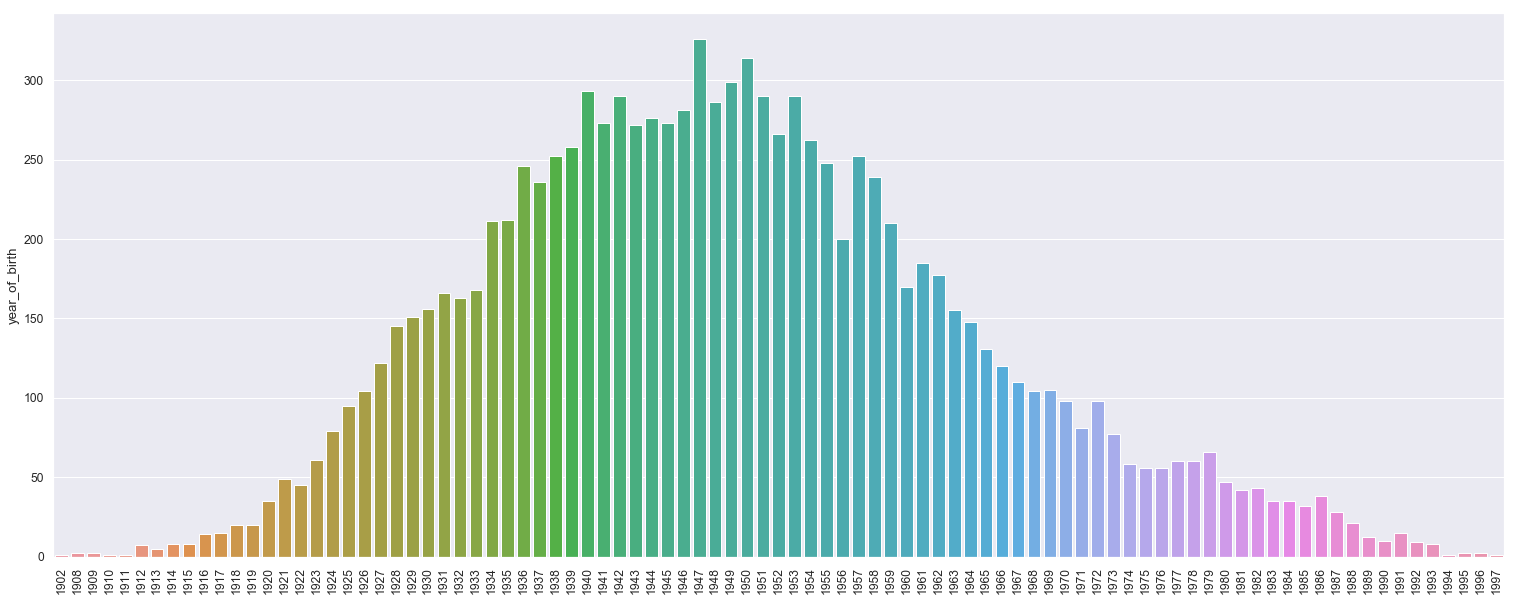

In [337]:
birth_year = df[df["year_of_birth"] != "--"]
birth_year = birth_year["year_of_birth"].apply(pd.to_numeric)
my_plot = sns.barplot(x=birth_year[0:].value_counts().index, y=birth_year[0:].value_counts())
my_plot.tick_params(axis='x', which='major', pad=5, size=5)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)
my_plot.figure.set_size_inches(26, 10)
sns.set(font_scale=1)
    
   

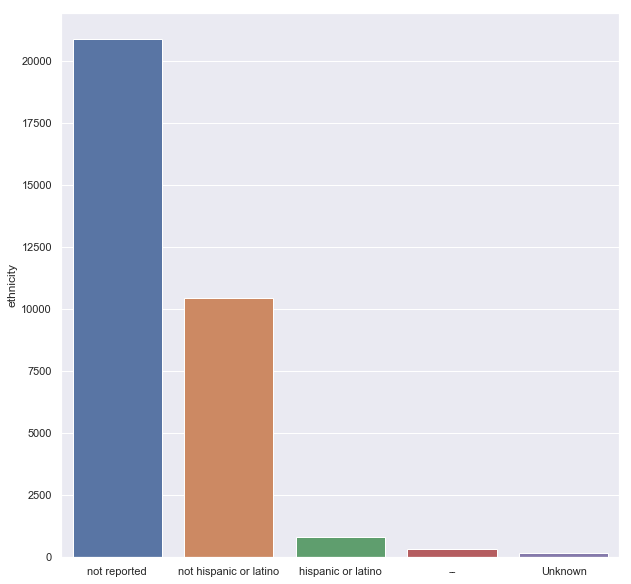

In [288]:
my_plot = sns.barplot(x=df["ethnicity"].value_counts().index, y=df["ethnicity"].value_counts())
my_plot.tick_params(axis='x', which='major', pad=5, size=5)
my_plot.set_xticklabels(my_plot.get_xticklabels())
my_plot.figure.set_size_inches(10, 10)
sns.set(font_scale=1)

In [293]:
#df["gender' == "male"].value_counts()
gender_diagnosis = df[['gender', 'primary_diagnosis']]
counts = gender_diagnosis.groupby('gender')['primary_diagnosis'].value_counts().unstack().fillna(0)
counts = counts.transpose()
print(type(counts))
print(counts)
female_sorted = counts.sort_values(by=['female'], ascending=False)
female_sorted = female_sorted['female']
male_sorted = counts.sort_values(by=['male'], ascending=False)
male_sorted = male_sorted['male']
print(female_sorted.head(15))
print(male_sorted.head(15))
print(type(male_sorted))


<class 'pandas.core.frame.DataFrame'>
gender                              --  female    male  not reported  unknown
primary_diagnosis                                                            
--                               294.0     0.0     0.0           0.0      0.0
Acinar adenocarcinoma              0.0     0.0   185.0           0.0      0.0
Acinar cell carcinoma              0.0     3.0     6.0           0.0      0.0
Acinar cell tumor                  0.0    17.0    14.0           0.0      0.0
Adenocarcinoma, NOS                0.0  3121.0  3158.0           0.0      6.0
Adenocarcinoma, diffuse type       0.0    37.0    32.0           0.0      0.0
Adenocarcinoma, intestinal type    0.0     8.0     9.0           0.0      0.0
Adenoid cystic carcinoma           0.0    88.0    73.0           0.0      0.0
Adenosquamous carcinoma            0.0    15.0    14.0           0.0      0.0
Adnexal carcinoma                  0.0     8.0    13.0           0.0      0.0
Adrenal cortical carcinoma

[Text(0,0,'Adenocarcinoma, NOS'),
 Text(0,0,'not reported'),
 Text(0,0,'Squamous cell carcinoma, NOS'),
 Text(0,0,'C61'),
 Text(0,0,'C64.9'),
 Text(0,0,'C71.9'),
 Text(0,0,'Carcinoma, NOS'),
 Text(0,0,'Melanoma, NOS'),
 Text(0,0,'Glioblastoma'),
 Text(0,0,'C34.1'),
 Text(0,0,'Non-small cell carcinoma'),
 Text(0,0,'Urothelial carcinoma, NOS'),
 Text(0,0,'Duct adenocarcinoma, NOS'),
 Text(0,0,'C22.0'),
 Text(0,0,'C71.0')]

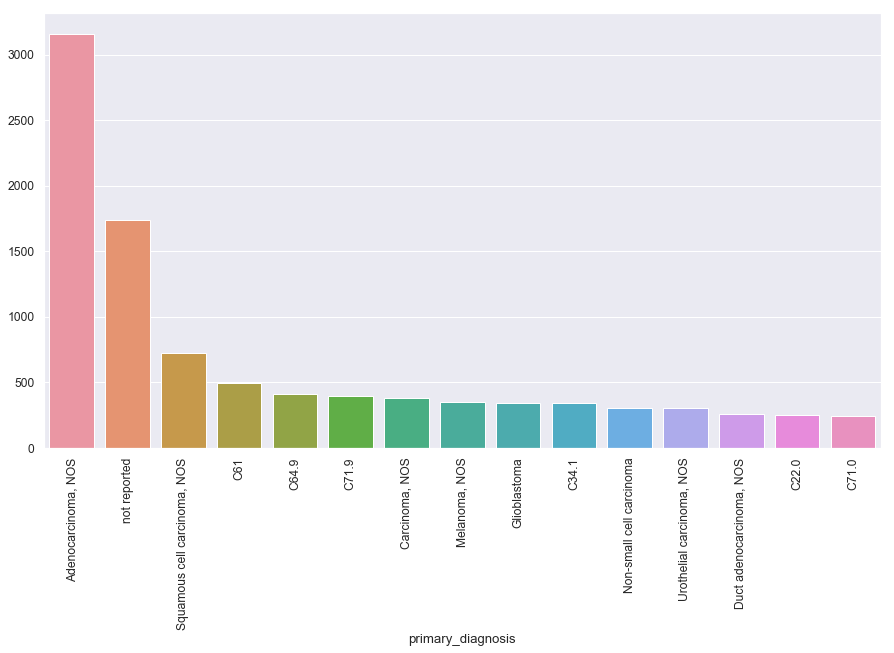

In [335]:
male_plot = sns.barplot(x=male_sorted.head(15).index, y=male_sorted.head(15).values)
male_plot.tick_params(axis='x', which='major')
male_plot.set_xticklabels(male_plot.get_xticklabels())
male_plot.figure.set_size_inches(15, 8)
sns.set(font_scale=1.1)
male_plot.set_xticklabels(male_plot.get_xticklabels(), rotation=90)

[Text(0,0,'Adenocarcinoma, NOS'),
 Text(0,0,'Carcinoma, NOS'),
 Text(0,0,'not reported'),
 Text(0,0,'Infiltrating duct carcinoma, NOS'),
 Text(0,0,'C50.9'),
 Text(0,0,'Serous carcinoma, NOS'),
 Text(0,0,'C56.9'),
 Text(0,0,'C54.1'),
 Text(0,0,'Squamous cell carcinoma, NOS'),
 Text(0,0,'C73'),
 Text(0,0,'Non-small cell carcinoma'),
 Text(0,0,'C53.9'),
 Text(0,0,'C71.9'),
 Text(0,0,'C64.9'),
 Text(0,0,'C34.1')]

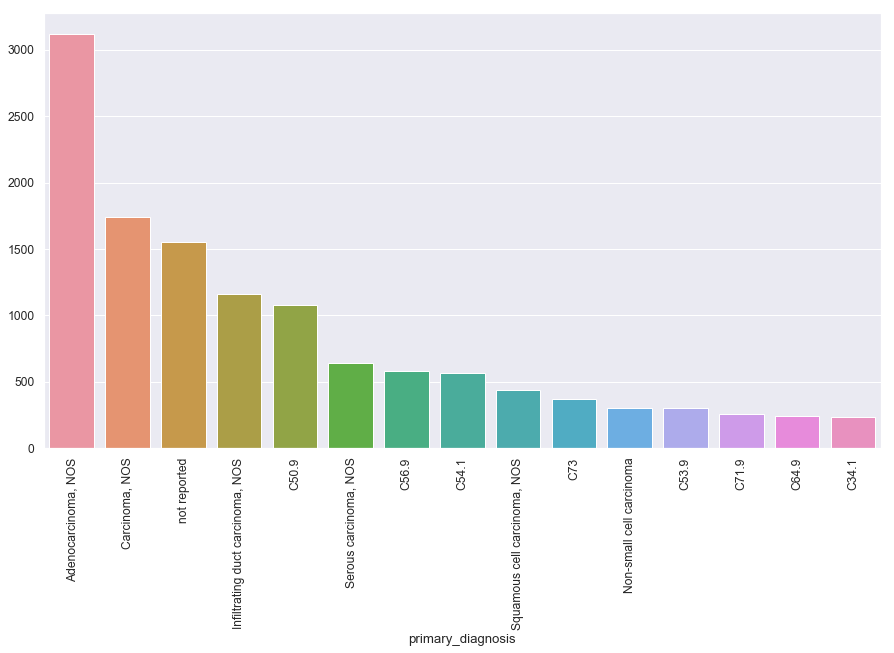

In [334]:
female_plot = sns.barplot(x=female_sorted.head(15).index, y=female_sorted.head(15).values)
female_plot.tick_params(axis='x', which='major')
female_plot.set_xticklabels(female_plot.get_xticklabels())
female_plot.figure.set_size_inches(15, 8)
sns.set(font_scale=1.1)
female_plot.set_xticklabels(female_plot.get_xticklabels(), rotation=90)